#### Robinhood Trading Bot

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keyring
from yahoo_fin import stock_info as si

import pyotp

#import trend model functions
from trendmodel import *

# import robinhood functions
import robin_stocks.robinhood as r
from rh_account import *

from datetime import date 

In [2]:
# connect to robinhood account
login = r.login(keyring.get_password("robinhood","username"),keyring.get_password("robinhood","password"))

ERROR: There was an issue loading pickle file. Authentication may be expired - logging in normally.


Please type in the MFA code:  031815


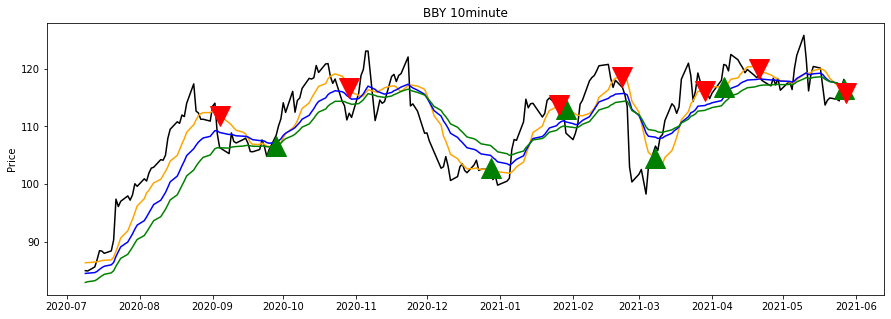

,High,Low,Open,Close,Volume,Adj Close,signal
Date,,,,,,,
2021-05-24,117.220001,114.550003,116.370003,114.699997,2145600.0,114.699997,0.0
2021-05-25,115.540001,114.000000,114.779999,114.419998,1907200.0,114.419998,0.0
2021-05-26,118.389999,115.220001,116.000000,116.959999,2969400.0,116.959999,0.0
2021-05-27,122.820000,116.629997,121.000000,118.139999,7718800.0,118.139999,1.0
2021-05-28,120.550003,114.139397,120.550003,114.279999,1398443.0,114.279999,0.0


In [17]:
# load predictive model
model_file = 'model.sav'
model = joblib.load(model_file)

# declare list to hold results
results = []
    
symbol = 'BBY'
start = date.today() - timedelta(days = 365) 
end = date.today()
price_df = get_historical(symbol, start, end)

# run model experiment
model_signals = get_model_signals(symbol, price_df, model)
model_return = backtest_signals(model_signals, 1)

# add signal to price df
price_df['signal'] = model_signals['signal']

# current signal
if (model_signals['signal'].tail(1).iloc[0] == 0):
    action = 'sell'
else:
    action = 'buy'

# assemble result
result = symbol, interval, model_return, action

# append results
results.append(result)  

# plot model signals
plot_signals(model_signals, symbol + ' ' + interval)

# print tail of prices
display(price_df.tail(5))

In [14]:
# get robinhood symbols
symbols = pd.DataFrame(r.account.get_watchlist_by_name("Stockbot")['results'])['symbol']

# override watchlist symbols for individual stocks on demand
symbols = ['BBY']

# set duration
intervals = ['day'] # valid intervals are ‘5minute’, ‘10minute’, ‘hour’, ‘day’, ‘week’. Default is ‘hour’.

results = process_symbols(symbols, intervals, source = "robinhood")
    
results_df = pd.DataFrame(results,columns=['symbol','interval','return','action'])

outputs = [] # list to hold output dataframes for each interval

for interval in intervals:
    output_df = results_df[results_df['interval'] == interval]
    output_df = output_df.sort_values(by=['symbol'])
    outputs.append(output_df)       
    
for output in outputs:
    display(output)

analyzing BBY


ValueError: Found array with 0 sample(s) (shape=(0, 9)) while a minimum of 1 is required.

In [31]:
# set buys for opening
buys = ['COIN']

# set total amount to invest
capital = 1000

# set list for order prices
current_prices = []
stop_prices = []
value = []
shares = []

for symbol in buys:
    current_price = r.stocks.get_latest_price(symbol)[0]
    stop_price = float(current_price) * .98
    equity = float(capital/len(buys))
    num_shares = int(equity/float(current_price))
    
    current_prices.append(current_price)
    stop_prices.append(stop_price)
    
    value.append(round(int(num_shares)*float(current_price),2))
    shares.append(num_shares)

buys_df = pd.DataFrame(buys, columns=['symbol'])
buys_df['current_price'] = current_prices
buys_df['stop_price'] = stop_prices
buys_df['value'] = value
buys_df['shares'] = shares
    
display(buys_df)


,symbol,current_price,stop_price,value,shares
0,COIN,303.120000,297.0576,909.36,3


In [15]:
# manual limit buy
manual_buy = True

if manual_buy:  
    stock = 'COIN'
    shares = 2
    price = 299
    r.order_buy_limit(stock,shares,price)

#### Buy Orders

In [23]:
live = True

# if not open order, place order
for row in buys_df.iterrows():
    stock = row[1]['symbol']
    shares = row[1]['shares']
    price = row[1]['current_price']
    stop = row[1]['stop_price']
    value = shares*price
    
    if(live):
        r.order_buy_limit(stock,shares,price)

In [13]:
# show open orders
open_orders = r.get_all_open_stock_orders()

if (open_orders):
    open_order_df = pd.DataFrame()
    # open_order_df[['price','stop_price','quantity','extended_hours','type','side','time_in_force']]
    open_order_df

Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...
Loading page 5 ...
Loading page 6 ...
Loading page 7 ...


#### Stop Loss Orders

In [ ]:
# TODO
for row in buys_df.iterrows():
    stock = row[1]['symbol']
    shares = row[1]['shares']
    stop = row[1]['stop_price']    
    
    if(live):
        r.

#### Portfolio Stocks

In [43]:
def get_symbol_robinhood_url(url):
    return r.account.get_symbol_by_url(url)

# get portfolio positions
positions = pd.DataFrame(r.account.get_open_stock_positions())

# get portfolio symbols
positions['symbol'] = positions['instrument'].apply(get_symbol_robinhood_url)
symbols = positions['symbol'].values

print(symbols)

# override symbols since COIN does not have enough history to plot
symbols = ['AAPL']

# set duration
intervals = ["day"] # valid intervals are ‘5minute’, ‘10minute’, ‘hour’, ‘day’, ‘week’. Default is ‘hour’.

results = process_symbols(symbols, intervals, source = "robinhood")
    
results_df = pd.DataFrame(results,columns=['symbol','interval','return','action'])

outputs = [] # list to hold output dataframes for each interval

for interval in intervals:
    output_df = results_df[results_df['interval'] == interval]
    output_df = output_df.sort_values(by=['symbol'])
    outputs.append(output_df)       
    
for output in outputs:
    display(output)

['AAPL' 'UPWK' 'SNOW' 'COIN']
analyzing AAPL


ValueError: Found array with 0 sample(s) (shape=(0, 9)) while a minimum of 1 is required.